In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mat
import seaborn as sns
mat.rcParams.update({'font.size': 22})
N=6

###CHANGE META INFORMATION###
#dir A/B
dir = 'B'
#4/6 ipver = 0 for both
ipver = 4
#packets/bytes
evaluating = 'bytes'
#what should be in the graph
dict = {'TCP': {}, 'UDP': {}, 'others': {}}
#############################

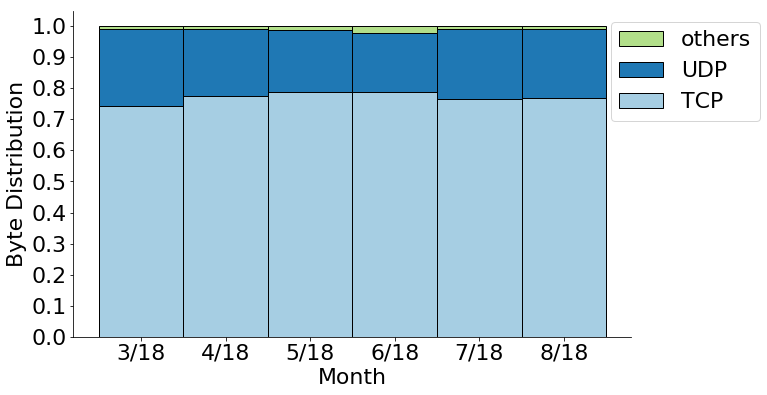

In [2]:
mat.rcParams.update({'font.size': 22})
sns.set_palette(sns.color_palette("Paired"))
plt.figure(figsize=(10,6))

plt.xlabel('Month')
topic = 'protocol'
tables = {}
for i in range(0,N):
    tables[i] = pd.read_table(f'../data/protocols_silk_0{i+3}_{dir}.csv', sep='|')
entries = 0
for entry in dict:
    dict[entry]['list']=[0]*N
    entries+=1
    
if evaluating == 'bytes':
    plt.ylabel('Byte Distribution')
else:
    plt.ylabel('Packet Distribution')
    
for i in range(0,N):
    if ipver != 0:
        x = tables[i].loc[(tables[i]['ip version'] == ipver)]
        top = x[topic].tolist()
    else:
        x = tables[i].groupby(topic)[[evaluating]].sum()
        top = x.index.values
    ev = x[evaluating].tolist()
    indexes = [0]*(entries-1)
    counter = 0
    for index, element in enumerate(top):
        if element in dict:
            indexes[counter] = index
            counter += 1
    for c,t in enumerate(indexes):
        top = np.delete(top,t-c)
        del ev[t-c]
    dict['others']['list'][i] = sum(ev)
    
for entry in dict:
    if entry != 'others':
        for i in range(0,N):
            if ipver != 0:
                x = tables[i].loc[(tables[i]['ip version'] == ipver) & (tables[i][topic] == entry)]
                y = x.values.tolist()
                if evaluating == 'packets':
                    dict[entry]['list'][i] = y[0][2]
                else: 
                    dict[entry]['list'][i] = y[0][3]
            else:
                x = tables[i].groupby(topic)[[evaluating]].sum()
                dict[entry]['list'][i] = x.loc[entry][evaluating]

for i in range(0,N):
    total = 0
    for entry in dict:
        total += dict[entry]['list'][i]
    for entry in dict:
        dict[entry]['list'][i]/=total

for entry in dict:
    dict[entry]['tuple']=tuple(dict[entry]['list'])

idx = np.arange(N)
width = 1

#bars
bars = {}
last = None
for entry in dict:
    if last != None:
        bars[entry] = plt.bar(idx, dict[entry]['tuple'], width, bottom=tuple(last), edgecolor = 'black')
    else:
        bars[entry] = plt.bar(idx, dict[entry]['tuple'], width, edgecolor = 'black')
        last = [0]*N
    last = [x + y for x, y in zip(last, dict[entry]['list'])]

#axes
x_axis=[0]*N
for i in range(0,N):
    x_axis[i]=str(i+3) + '/18'
plt.xticks(idx, tuple(x_axis))
plt.yticks(np.arange(0, 1.05, step=0.1))

#legend
bars_ar = [None]*entries
names_ar = [None]*entries
counter = 0
for entry in dict:
    bars_ar[counter]=bars[entry]
    names_ar[counter] = entry
    counter+=1

leg = plt.legend(tuple(bars_ar)[::-1], tuple(names_ar)[::-1], loc='upper right')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.draw()
bb = leg.get_bbox_to_anchor().inverse_transformed(ax.transAxes)
xOffset = 0.25
bb.x0 += xOffset
bb.x1 += xOffset
leg.set_bbox_to_anchor(bb, transform = ax.transAxes)
plt.show()